# Customer Personality Analysis
### by Zheng, Amanda 

Many brands and stores have their loyalty programs, and the sales assistants will ask for your personal information to get you involve in the programs with your first purchase. After that, the brands can track your shopping behaviors through both your browsing history and purchase record both instore and online. They also can email you the newest campaigns with good offers. This project is standing at the side of the seller to mimic the analysis before marketing. Summarizing the customer segments with different income and background and analyzing the shopping habits of each segment to increase the selling.

In this project, I use the data of "marketing campaign" and target to solve the following questions:
* What are the distributions of the basic information of customers (age, income, spending)
* How do the factors related to the amount that the customers spend
* What are the customers' reaction to promotions

Firstly, I will clean the dataset and remove some customers that have not enough data, and only keep the columns relevant. Then find the distribution of the birth year, income, and education level and the total amount they spending in the recent two years among customers. 

Then a linear regression model can tell me the most related factors that the customers would like to purchase. In this way, the company could distinguish the customers into different sectors and provide different promotions to the targeting sectors.

As a customer, I do not really like to receive the campaign emails, and hardly read them. Thus in this project, I want to figure out does the promotions work well, and how do other customers react to the promotions.

## Import Packages

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn import linear_model
import collections
import seaborn as sns
pd.__version__
%matplotlib inline

## Data Importing

In [85]:
marketing = pd.read_csv("marketing_campaign.csv", sep='\t')
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


The dataset contains basic information of the customers such as their birth years, education levels, incomes and families, the amount spend on each kind of products, their reactions to promotions and purchasing methods. Here are the full names of each column.

#### personal info
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Data Cleaning
Simply remove some customers that have not enough data.

In [86]:
marketing = marketing.dropna()
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In order to solve the questions above, we only care about the personal information of the customers and their purchase power, so we can only keep the columns relevant and calculating the extra data we need.

In [87]:
df1 = marketing[['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','Complain','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88
1,1954,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6
2,1965,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42
3,1984,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5
4,1981,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15


In [88]:
#calculate the age of each customer
df1['Age'] = 2021-df1['Year_Birth']
#calculate the total spending of each customer in the previous 2 years
dflist = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df1['Spending'] = df1[dflist].sum(axis = 1)
df1.head()

/tmp/ipykernel_610/159176760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = 2021-df1['Year_Birth']
/tmp/ipykernel_610/159176760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Spending'] = df1[dflist].sum(axis = 1)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Spending
0,1957,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,64,1617
1,1954,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,67,27
2,1965,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,56,776
3,1984,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,37,53
4,1981,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,40,422


## Part 1: Distribution
With intuitive thinking, the customers with higher education level, higher income, and elder would like to spend more. So, firstly let's find the distribution of their ages, incomes, and education levels.

[Text(0.5, 1.0, 'Customer Age Frequency Histogram'), Text(0, 0.5, 'Frequency')]

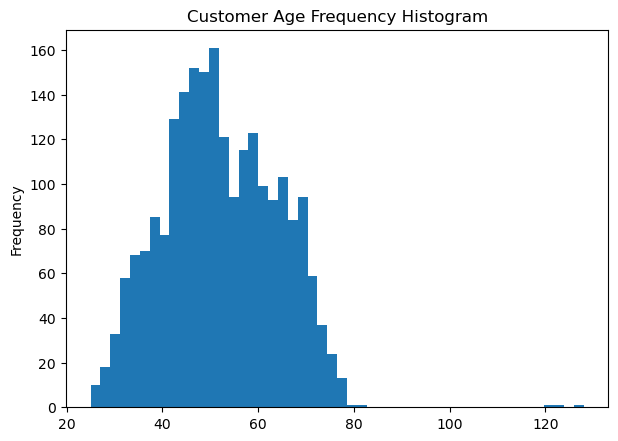

In [89]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = df1.Age
plt.hist(x, bins=50)
plt.gca().set(title='Customer Age Frequency Histogram', ylabel='Frequency')

[Text(0.5, 1.0, 'Customer Education Level Frequency Histogram'),
 Text(0, 0.5, 'Frequency')]

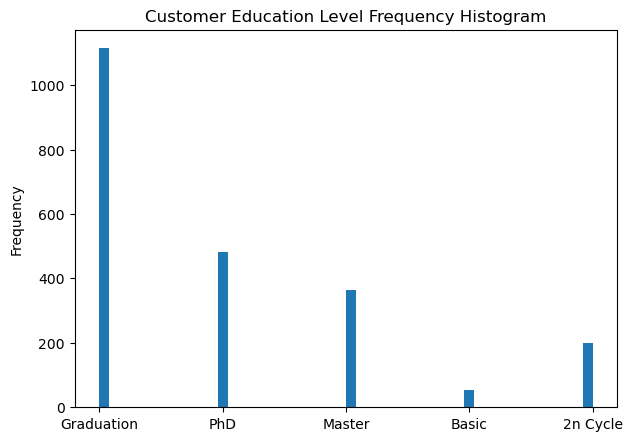

In [90]:
x2 = df1.Education
plt.hist(x2, bins=50)
plt.gca().set(title='Customer Education Level Frequency Histogram', ylabel='Frequency')

In [91]:
counter2=collections.Counter(df1['Education'])
print(counter2)

Counter({'Graduation': 1116, 'PhD': 481, 'Master': 365, '2n Cycle': 200, 'Basic': 54})


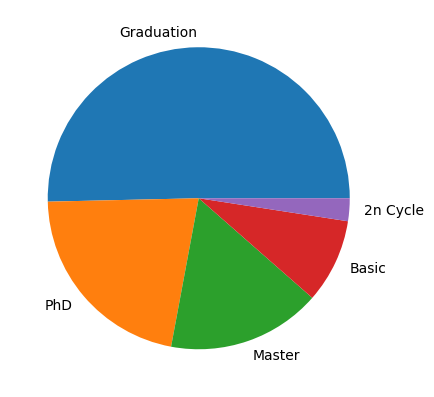

In [92]:
y = np.array([1116, 481, 365, 200,54])
mylabels = ["Graduation", "PhD", "Master", "Basic", "2n Cycle"]
plt.pie(y, labels = mylabels)
plt.show() 

[Text(0.5, 1.0, 'Customer Income Frequency Histogram'),
 Text(0, 0.5, 'Frequency')]

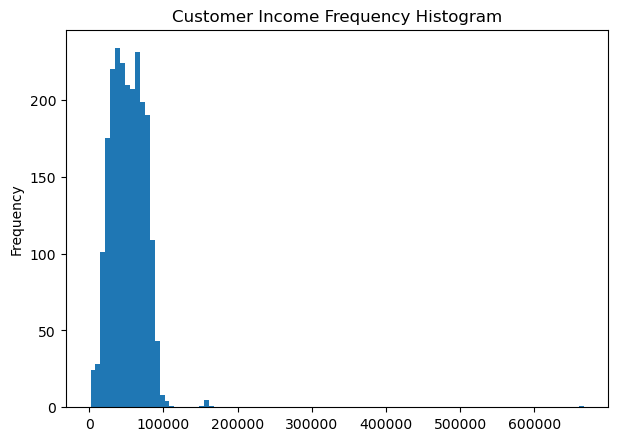

In [93]:
x3 = df1.Income
plt.hist(x3, bins=100)
plt.gca().set(title='Customer Income Frequency Histogram', ylabel='Frequency')

[Text(0.5, 1.0, 'Amount of Customer Speinding Frequency Histogram'),
 Text(0, 0.5, 'Frequency')]

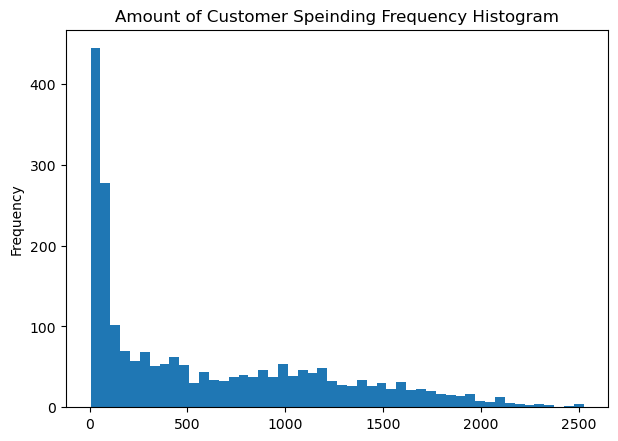

In [94]:
x4 = df1.Spending
plt.hist(x4, bins=50)
plt.gca().set(title='Amount of Customer Speinding Frequency Histogram', ylabel='Frequency')

### Conclusion from the distributions
1. The distribution of customer ages and income are nearly normal except some outliers.
2. Among the customers half of them have a graduation degree.
3. Many of the customers spend below 500 in the last two years, and the frequency sharply decrease to about 50 spending from 500 to 2500. The more amount, the fewer people.

## Part 2: Linear Regression
In this part, we will find out how the categories related to the customers spending with a linear regression model, and the company can use the model predict the potential spending of each customer given their personal information.
### Income Against Log_spending

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year_Birth        2216 non-null   int64  
 1   Education         2216 non-null   object 
 2   Marital_Status    2216 non-null   object 
 3   Income            2216 non-null   float64
 4   Kidhome           2216 non-null   int64  
 5   Teenhome          2216 non-null   int64  
 6   Recency           2216 non-null   int64  
 7   Complain          2216 non-null   int64  
 8   MntWines          2216 non-null   int64  
 9   MntFruits         2216 non-null   int64  
 10  MntMeatProducts   2216 non-null   int64  
 11  MntFishProducts   2216 non-null   int64  
 12  MntSweetProducts  2216 non-null   int64  
 13  MntGoldProds      2216 non-null   int64  
 14  Age               2216 non-null   int64  
 15  Spending          2216 non-null   int64  
dtypes: float64(1), int64(13), object(2)
memory

In [96]:
# convert everything to be a float
X = df1.drop(["Year_Birth", "Education", "Marital_Status","Spending"], axis=1).copy()
X['Income'] = X['Income'].astype(float)
X['Kidhome'] = X['Kidhome'].astype(float)
X['Teenhome'] = X['Teenhome'].astype(float)
X['Recency'] = X['Recency'].astype(float)
X['Complain'] = X['Complain'].astype(float)
X['MntWines'] = X['MntWines'].astype(float)
X['MntFruits'] = X['MntFruits'].astype(float)
X['MntMeatProducts'] = X['MntMeatProducts'].astype(float)
X['MntFishProducts'] = X['MntFishProducts'].astype(float)
X['MntSweetProducts'] = X['MntSweetProducts'].astype(float)
X['MntGoldProds'] = X['MntGoldProds'].astype(float)
X['Age'] = X['Age'].astype(float)
X.head()

,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,58138.0,0.0,0.0,58.0,0.0,635.0,88.0,546.0,172.0,88.0,88.0,64.0
1,46344.0,1.0,1.0,38.0,0.0,11.0,1.0,6.0,2.0,1.0,6.0,67.0
2,71613.0,0.0,0.0,26.0,0.0,426.0,49.0,127.0,111.0,21.0,42.0,56.0
3,26646.0,1.0,0.0,26.0,0.0,11.0,4.0,20.0,10.0,3.0,5.0,37.0
4,58293.0,1.0,0.0,94.0,0.0,173.0,43.0,118.0,46.0,27.0,15.0,40.0


In [97]:
y = np.log(df1["Spending"])
df1["log_spending"] = y
y.head()

/tmp/ipykernel_610/2126364164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["log_spending"] = y


0    7.388328
1    3.295837
2    6.654153
3    3.970292
4    6.045005
Name: Spending, dtype: float64

Plot on how the income itself related to log_spending.

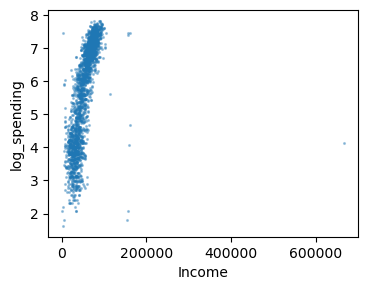

In [98]:
def var_scatter(df1, ax=None, var="Income"):
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    df1.plot.scatter(x=var , y="log_spending", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(df1);

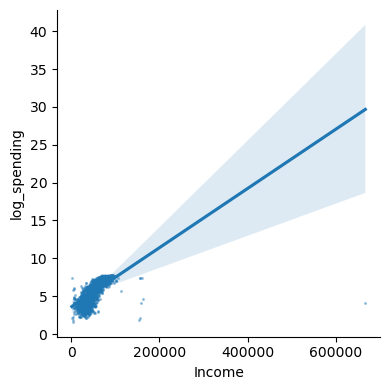

In [99]:
# With linear regression line
sns.lmplot(
    data=df1, x="Income", y="log_spending", height=4,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

In [100]:
# construct the model instance
income_lr_model = linear_model.LinearRegression()

# fit the model
income_lr_model.fit(X[["Income"]], y)

# print the coefficients
beta_0 = income_lr_model.intercept_
beta_1 = income_lr_model.coef_[0]

print(f"Fit model: log(spending) = {beta_0:.4f} + {beta_1:.4f} income")

Fit model: log(spending) = 3.5669 + 0.0000 income


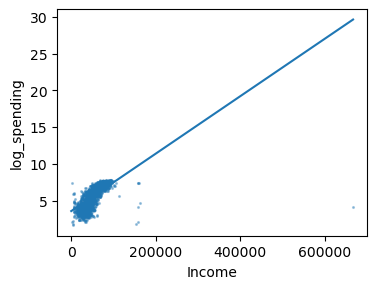

In [101]:
# construct the plot
ax = var_scatter(df1)
x = np.array([0, df1["Income"].max()])
ax.plot(x, beta_0 + beta_1*x)

Since the slope is too small, the model cannot predict the potential log_spending from the income, and there is a outlier of income lies above 600000 dollars.

Let's try drop the outlier data.

In [103]:
df = df1[df1.Income < 200000]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Spending,log_spending
0,1957,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,64,1617,7.388328
1,1954,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,67,27,3.295837
2,1965,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,56,776,6.654153
3,1984,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,37,53,3.970292
4,1981,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,40,422,6.045005


In [104]:
X1= X[X.Income < 200000]
X1.head()

,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,58138.0,0.0,0.0,58.0,0.0,635.0,88.0,546.0,172.0,88.0,88.0,64.0
1,46344.0,1.0,1.0,38.0,0.0,11.0,1.0,6.0,2.0,1.0,6.0,67.0
2,71613.0,0.0,0.0,26.0,0.0,426.0,49.0,127.0,111.0,21.0,42.0,56.0
3,26646.0,1.0,0.0,26.0,0.0,11.0,4.0,20.0,10.0,3.0,5.0,37.0
4,58293.0,1.0,0.0,94.0,0.0,173.0,43.0,118.0,46.0,27.0,15.0,40.0


In [105]:
y3 = np.log(df["Spending"])
df["log_spending"] = y3
y3.head()

/tmp/ipykernel_610/2788755996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_spending"] = y3


0    7.388328
1    3.295837
2    6.654153
3    3.970292
4    6.045005
Name: Spending, dtype: float64

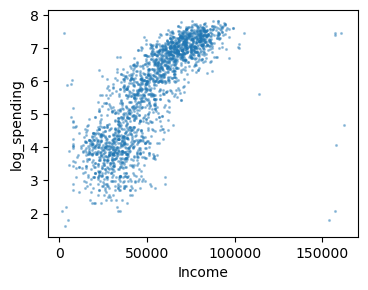

In [106]:
def var_scatter(df, ax=None, var="Income"):
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    df.plot.scatter(x=var , y="log_spending", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(df);

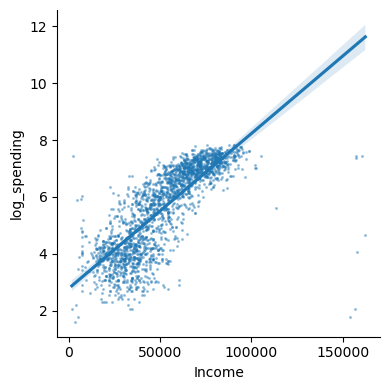

In [107]:
# With linear regression line
sns.lmplot(
    data=df, x="Income", y="log_spending", height=4,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

In [108]:
# construct the model instance
income_lr_model = linear_model.LinearRegression()

# fit the model
income_lr_model.fit(X1[["Income"]], y3)

# print the coefficients
beta_0 = income_lr_model.intercept_
beta_1 = income_lr_model.coef_[0]

print(f"Fit model: log_spending = {beta_0:.4f} + {beta_1:.4f} income")

Fit model: log_spending = 2.7830 + 0.0001 income


Now we can use this model to predict the potential spending.

For example, if the income of a customer is 50,000:

In [109]:
spend_50k = income_lr_model.predict([[50000]])[0]
print(f"The model predicts with 50,000 income would spend {np.exp(spend_50k):.2f} dollars to purchase from this company.")

The model predicts with 50,000 income would spend 246.19 dollars to purchase from this company.


In [110]:
spend_10k = income_lr_model.predict([[10000]])[0]
print(f"The model predicts with 10,000 income would spend {np.exp(spend_10k):.2f} dollars to purchase from this company.")

The model predicts with 10,000 income would spend 27.87 dollars to purchase from this company.


### Multivariate Linear Regression

In [111]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X1, y3)

LinearRegression()

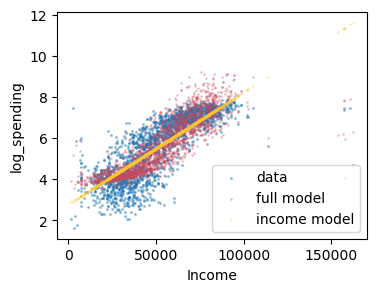

In [112]:
ax = var_scatter(df)
colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']
def scatter_model(mod, X1, ax=None, color=colors[1], x="Income"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X1[x], mod.predict(X1), c=color, alpha=0.25, s=1)
    return ax

scatter_model(lr_model, X1, ax, color=colors[1])
scatter_model(income_lr_model, X1[["Income"]], ax, color=colors[2])
ax.legend(["data", "full model", "income model"])

### Conclusion from the Linear Regressions
Comparing the linear regression taking income as the only variable and multivariate linear regression, we find that the model fits better in multivariate linear regression. It shows the higher income related to higher potential spending.

## Part 3: Customer reaction to promotions


In [113]:
# construct another dataset only contains the promotion columns
df2 = marketing[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]
df2.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0


Suppose the total number of promotions of each campaign is larger than 5 times, we simply add all the `AcceptedCmp` and `Response` to the total number of campaigns that are accepted by the customers.

In [114]:
#calculate the total amount that each customer "answered" the campaign
dflist2 = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df2['TotalAcceptedCmp'] = df2[dflist2].sum(axis = 1)
df2.head()

/tmp/ipykernel_610/4245561514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalAcceptedCmp'] = df2[dflist2].sum(axis = 1)


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,TotalAcceptedCmp
0,3,0,0,0,0,0,1,1
1,2,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0


Then we compare the number of purchases made with a discount(`NumDealsPurchases`) and the total number of campaigns that are accepted by the customers(`TotalAcceptedCmp`) by calculating the campaign accepted efficiency(`Efficiency`) using `TotalAcceptedCmp` divided by `NumDealsPurchases`.

In [115]:
#calculate campaign accepted efficiency
df2["Efficiency(%)"] = df2["TotalAcceptedCmp"]/df2["NumDealsPurchases"]*100
df2.head()

/tmp/ipykernel_610/305386361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Efficiency(%)"] = df2["TotalAcceptedCmp"]/df2["NumDealsPurchases"]*100


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,TotalAcceptedCmp,Efficiency(%)
0,3,0,0,0,0,0,1,1,33.333333
1,2,0,0,0,0,0,0,0,0.000000
2,1,0,0,0,0,0,0,0,0.000000
3,2,0,0,0,0,0,0,0,0.000000
4,5,0,0,0,0,0,0,0,0.000000


In [116]:
gbEffifiency = df2.groupby("Efficiency(%)")
df3 = gbEffifiency.count()
df3.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,TotalAcceptedCmp
Efficiency(%),,,,,,,,
0.000000,1593,1593,1593,1593,1593,1593,1593,1593
9.090909,2,2,2,2,2,2,2,2
10.000000,3,3,3,3,3,3,3,3
11.111111,2,2,2,2,2,2,2,2
12.500000,1,1,1,1,1,1,1,1


<AxesSubplot:title={'center':'Efiiciency Distribution'}, xlabel='Efficicy', ylabel='num'>

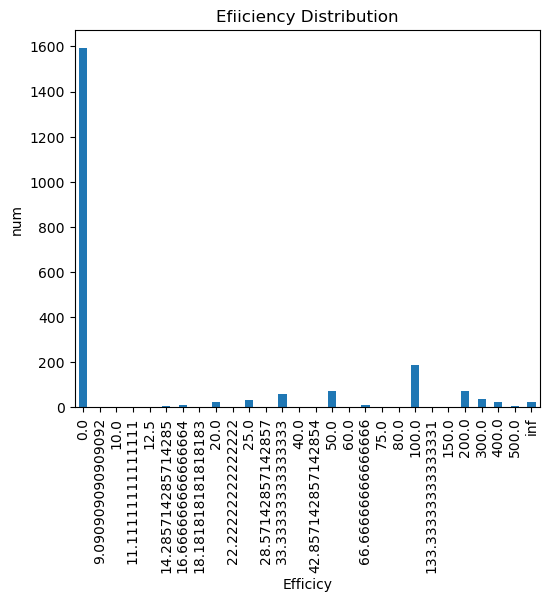

In [117]:
dfg = gbEffifiency['Efficiency(%)'].count()
dfg.plot(kind='bar', title='Efiiciency Distribution', ylabel='num',
         xlabel='Efficicy', figsize=(6, 5))

<AxesSubplot:ylabel='Efficiency(%)'>

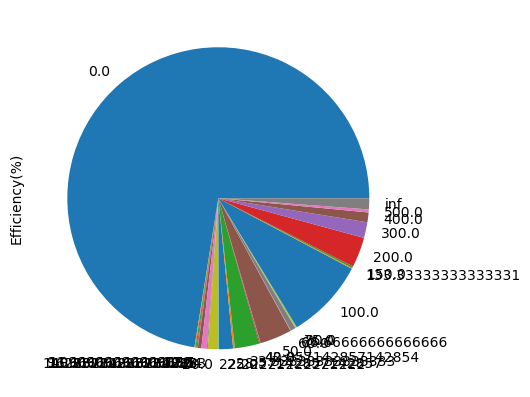

In [118]:
dfg.plot.pie()

In [119]:
pct_0 = 1593/(len(df2['NumDealsPurchases'].tolist())+1)*100
print(f'0% efficiency contains {pct_0 }% of customers')

0% efficiency contains 71.85385656292287% of customers


### Conclusion from the promotions
1. The promotions do not have any influence on most of the customers because there are about 1600 samples shows 0 efficiency which makes up 71.85% of the customers.
2. Since there still many samples shows more than 100% of campaign efficiency, people would like to purchase under discount but not because of the promotion activities.

Thus, we can conclude that the campaign does not have dominating effects to customers' purchasing behavior.

## References
1. Analysis of company's ideal customers, Akash Patel, 2021: https://www.kaggle.com/imakash3011/customer-personality-analysis
2. marketing_campaign.csv https://www.kaggle.com/imakash3011/customer-personality-analysis
3. collections — Container datatypes: https://docs.python.org/3/library/collections.html#collections.Counter
4. Other coding references are from teaching resources of this course: https://github.com/ubcecon/ECON323_2021_Fall/blob/master/schedule2.md